<a href="https://colab.research.google.com/github/sdm373373/basketball_reference_web_scraper/blob/master/3x2_play_by_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Setup Notebook

!apt-get install openjdk-8-jdk-headless
!pip install pyspark
!pip install pandas
!pip install basketball_reference_scraper
!pip install pytz
!pip install findspark
!pip install oddscalculator
!mkdir games

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 4 not upgraded.
Need to get 36.6 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u342-b07-0ubuntu1~18.04 [28.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u342-b07-0ubuntu1~18.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import findspark

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

findspark.init()

findspark.find()

'/usr/local/lib/python3.7/dist-packages/pyspark'

In [ ]:
from basketball_reference_scraper.seasons import get_schedule

games = get_schedule(2023)

games

,DATE,VISITOR,VISITOR_PTS,HOME,HOME_PTS
0,2022-10-18,Philadelphia 76ers,117.0,Boston Celtics,126.0
1,2022-10-18,Los Angeles Lakers,109.0,Golden State Warriors,123.0
2,2022-10-19,Orlando Magic,109.0,Detroit Pistons,113.0
3,2022-10-19,Washington Wizards,114.0,Indiana Pacers,107.0
4,2022-10-19,Houston Rockets,107.0,Atlanta Hawks,117.0
...,...,...,...,...,...
1225,2023-04-09,Utah Jazz,NaN,Los Angeles Lakers,NaN
1226,2023-04-09,New Orleans Pelicans,NaN,Minnesota Timberwolves,NaN
1227,2023-04-09,Memphis Grizzlies,NaN,Oklahoma City Thunder,NaN
1228,2023-04-09,Los Angeles Clippers,NaN,Phoenix Suns,NaN


In [ ]:
import os
import time
from basketball_reference_scraper.shot_charts import get_shot_chart
from basketball_reference_scraper.constants import TEAM_TO_TEAM_ABBR

i = 0
for index, game in games.iterrows():
    gameTime = str(game["DATE"]).split(" ")[0]
    homeTeam = TEAM_TO_TEAM_ABBR[game["HOME"].upper()]
    awayTeam = TEAM_TO_TEAM_ABBR[game["VISITOR"].upper()]
    fileName = gameTime + "_" + homeTeam + ".csv"
    if os.path.exists("games/" + fileName):
        print("Game: " + fileName + " already exists")
        continue
    
    try:
        print("Downloading: " + fileName)
        df = get_shot_chart(gameTime, homeTeam, awayTeam)
        df[homeTeam]['relevant_team'] = homeTeam
        df[awayTeam]['relevant_team'] = awayTeam
        dfCombined = df[homeTeam].append(df[awayTeam])
        dfCombined["period_type"] = 'QUARTER'
        dfCombined["remaining_seconds_in_period"] = dfCombined['TIME_REMAINING'].apply(lambda x: sum(float(x) * 60 ** i for i, x in enumerate(reversed(str(x).split(':')))))
        dfCombined["home_team"] = homeTeam
        dfCombined["away_team"] = awayTeam
        dfCombined.rename(columns={'QUARTER': 'period', 'VALUE': 'shot_type', 'MAKE_MISS': 'shot_result', 'PLAYER': 'player'}, inplace=True)
        dfCombined.drop(columns=['TIME_REMAINING', 'x', 'y', 'DISTANCE'], inplace=True)
        dfCombined = dfCombined[['period','period_type','remaining_seconds_in_period','relevant_team','away_team','home_team','player','shot_type','shot_result']]
        dfCombined.to_csv("games/" + fileName, index=False)
        i += 1

        time.sleep(0.2)
    except:
        print("Error: " + fileName)
        break

print("Downloaded " + str(i) + " games")

Downloading: 2022-10-18_BOS.csv
Downloading: 2022-10-18_GSW.csv
Downloading: 2022-10-19_DET.csv
Downloading: 2022-10-19_IND.csv
Downloading: 2022-10-19_ATL.csv
Downloading: 2022-10-19_BRK.csv
Downloading: 2022-10-19_MEM.csv
Downloading: 2022-10-19_MIA.csv
Downloading: 2022-10-19_TOR.csv
Downloading: 2022-10-19_MIN.csv
Downloading: 2022-10-19_SAS.csv
Downloading: 2022-10-19_UTA.csv
Downloading: 2022-10-19_PHO.csv
Downloading: 2022-10-19_SAC.csv
Downloading: 2022-10-20_PHI.csv
Downloading: 2022-10-20_LAL.csv
Downloading: 2022-10-21_CHO.csv
Downloading: 2022-10-21_IND.csv
Downloading: 2022-10-21_WAS.csv
Downloading: 2022-10-21_ATL.csv
Downloading: 2022-10-21_BRK.csv
Downloading: 2022-10-21_MIA.csv
Downloading: 2022-10-21_NYK.csv
Downloading: 2022-10-21_HOU.csv
Downloading: 2022-10-21_MIN.csv
Downloading: 2022-10-21_GSW.csv
Downloading: 2022-10-21_POR.csv
Downloading: 2022-10-22_PHI.csv
Downloading: 2022-10-22_IND.csv
Downloading: 2022-10-22_ORL.csv
Downloading: 2022-10-22_CHI.csv
Download

In [ ]:
import os
import glob
import pandas as pd

all_filenames = [i for i in glob.glob('games/[0-9AZ]*.{}'.format('csv'))]

combined_csv = pd.DataFrame()

#combine all files in the list
for f in all_filenames:
    df = pd.read_csv(f)
    df.insert(0, 'game_id', f.split('/')[1].split('.')[0])
    combined_csv = pd.concat([combined_csv, df])

#export to csv
combined_csv.to_csv("combined_games.csv", index=False, encoding='utf-8')

In [ ]:
#import findspark
#findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("NBA_Data").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

dfAll = spark.read.format("csv").option("header", "true").load("combined_games.csv")

dfAll.createOrReplaceTempView("all_shots")

dfAll.show(10)

+--------------+------+-----------+---------------------------+-------------+---------+---------+-----------------+---------+-----------+
|       game_id|period|period_type|remaining_seconds_in_period|relevant_team|away_team|home_team|           player|shot_type|shot_result|
+--------------+------+-----------+---------------------------+-------------+---------+---------+-----------------+---------+-----------+
|2022-10-30_DAL|   1.0|    QUARTER|                      686.0|          DAL|      ORL|      DAL|     JaVale McGee|      2.0|       MISS|
|2022-10-30_DAL|   1.0|    QUARTER|                      642.0|          DAL|      ORL|      DAL|      Luka Dončić|      2.0|       MAKE|
|2022-10-30_DAL|   1.0|    QUARTER|                      608.0|          DAL|      ORL|      DAL|Spencer Dinwiddie|      2.0|       MISS|
|2022-10-30_DAL|   1.0|    QUARTER|                      584.0|          DAL|      ORL|      DAL|      Luka Dončić|      3.0|       MAKE|
|2022-10-30_DAL|   1.0|    QUARTER

In [ ]:
# Shot breakdown for first 3 mins by player
df3x2_player_detail = spark.sql("""select game_id, relevant_team, player, shot_type, shot_result, count(*) as total_shots
from all_shots 
where period_type = 'QUARTER' and period = 1 and cast(remaining_seconds_in_period as int) > 540 --and game_id > '2022-02-15'
group by game_id, relevant_team, player, shot_type, shot_result
order by game_id, relevant_team, player, shot_type""")

df3x2_player_detail.createOrReplaceTempView("3x2_player_detail")

df3x2_player_shot_breakdown = spark.sql("""select d.relevant_team, d.player,
  coalesce((select sum(total_shots) from 3x2_player_detail x where d.player = x.player and d.relevant_team = x.relevant_team and x.shot_type = 3 and x.shot_result = 'MAKE'), 0) as three_pt_made,
  coalesce((select sum(total_shots) from 3x2_player_detail x where d.player = x.player and d.relevant_team = x.relevant_team and x.shot_type = 3), 0) as three_pt_attempts,
  coalesce((select sum(total_shots) from 3x2_player_detail x where d.player = x.player and d.relevant_team = x.relevant_team), 0) as total_shots
from (select distinct relevant_team, player from 3x2_player_detail) d""")

df3x2_player_shot_breakdown.createOrReplaceTempView("3x2_player_shot_breakdown")

df3x2_player_shot_breakdown_pt2 = spark.sql("""select relevant_team, player, three_pt_made, three_pt_attempts, total_shots,
  ROUND((three_pt_made / three_pt_attempts * 100), 2) as 3pt_make_percentage,
  ROUND((three_pt_attempts / total_shots * 100), 2) as 3pt_shot_percentage
from 3x2_player_shot_breakdown
order by three_pt_made desc""")

df3x2_player_shot_breakdown_pt2.createOrReplaceTempView("3x2_player_shot_breakdown_pt2")

df3x2_player_shot_breakdown_pt2.show()

+-------------+--------------------+-------------+-----------------+-----------+-------------------+-------------------+
|relevant_team|              player|three_pt_made|three_pt_attempts|total_shots|3pt_make_percentage|3pt_shot_percentage|
+-------------+--------------------+-------------+-----------------+-----------+-------------------+-------------------+
|          DEN|  Michael Porter Jr.|            6|                8|         12|               75.0|              66.67|
|          GSW|      Andrew Wiggins|            6|               10|         16|               60.0|               62.5|
|          WAS|  Kristaps Porziņģis|            5|               10|         17|               50.0|              58.82|
|          MIA|         Tyler Herro|            4|                4|         12|              100.0|              33.33|
|          SAS|      Keldon Johnson|            4|                7|         11|              57.14|              63.64|
|          BOS|        Jayson Ta

In [ ]:
# Shot breakdown for first 3 minutes
df3x2_detail = spark.sql("""select game_id, home_team, away_team, relevant_team, shot_type, shot_result, count(*) as total_shots
from all_shots 
where period_type = 'QUARTER' and period = 1 and cast(remaining_seconds_in_period as int) > 540
group by game_id, home_team, away_team, relevant_team, shot_type, shot_result
order by game_id, shot_type""")

df3x2_detail.createOrReplaceTempView("3x2_detail")

df3x2_detail.show()

+--------------+---------+---------+-------------+---------+-----------+-----------+
|       game_id|home_team|away_team|relevant_team|shot_type|shot_result|total_shots|
+--------------+---------+---------+-------------+---------+-----------+-----------+
|2022-10-18_BOS|      BOS|      PHI|          PHI|      2.0|       MISS|          4|
|2022-10-18_BOS|      BOS|      PHI|          BOS|      2.0|       MISS|          3|
|2022-10-18_BOS|      BOS|      PHI|          PHI|      2.0|       MAKE|          1|
|2022-10-18_BOS|      BOS|      PHI|          BOS|      2.0|       MAKE|          2|
|2022-10-18_BOS|      BOS|      PHI|          BOS|      3.0|       MAKE|          1|
|2022-10-18_BOS|      BOS|      PHI|          PHI|      3.0|       MISS|          1|
|2022-10-18_BOS|      BOS|      PHI|          BOS|      3.0|       MISS|          1|
|2022-10-18_GSW|      GSW|      LAL|          GSW|      2.0|       MAKE|          1|
|2022-10-18_GSW|      GSW|      LAL|          LAL|      2.0|     

In [ ]:
from pyspark.sql.functions import col, round, row_number, lit
from pyspark.sql.window import Window

df3x2_makes = spark.sql("""select game_id, home_team, away_team, sum(total_shots) as 3pt_makes
from 3x2_detail 
where shot_result = 'MAKE' and shot_type = 3
group by game_id, home_team, away_team, shot_type, shot_result
order by game_id""")

df3x2_makes.createOrReplaceTempView("3x2_makes")

df3x2_zeros = spark.sql("""select distinct game_id, home_team, away_team, 0 as 3pt_makes
from all_shots where game_id not in (select distinct game_id from 3x2_makes)""")

df3x2_results = df3x2_makes.union(df3x2_zeros).withColumn("game_number", row_number().over(Window.partitionBy(lit(0)).orderBy(col("game_id"))))

df3x2_results.createOrReplaceTempView("3x2_results")

df3x2_results.show()

+--------------+---------+---------+---------+-----------+
|       game_id|home_team|away_team|3pt_makes|game_number|
+--------------+---------+---------+---------+-----------+
|2022-10-18_BOS|      BOS|      PHI|        1|          1|
|2022-10-18_GSW|      GSW|      LAL|        0|          2|
|2022-10-19_ATL|      ATL|      HOU|        0|          3|
|2022-10-19_BRK|      BRK|      NOP|        1|          4|
|2022-10-19_DET|      DET|      ORL|        0|          5|
|2022-10-19_IND|      IND|      WAS|        3|          6|
|2022-10-19_MEM|      MEM|      NYK|        3|          7|
|2022-10-19_MIA|      MIA|      CHI|        2|          8|
|2022-10-19_MIN|      MIN|      OKC|        0|          9|
|2022-10-19_PHO|      PHO|      DAL|        0|         10|
|2022-10-19_SAC|      SAC|      POR|        4|         11|
|2022-10-19_SAS|      SAS|      CHO|        0|         12|
|2022-10-19_TOR|      TOR|      CLE|        1|         13|
|2022-10-19_UTA|      UTA|      DEN|        1|         1

+---------+-----+
|3pt_makes|count|
+---------+-----+
|        0|   28|
|        1|   43|
|        2|   24|
|        3|   16|
|        4|    5|
|        5|    1|
|        6|    2|
+---------+-----+

48 / 119 = 40.34%


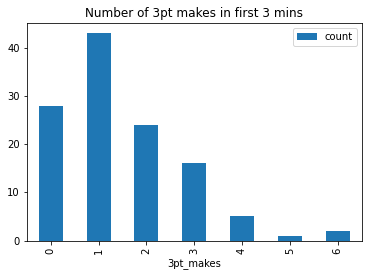

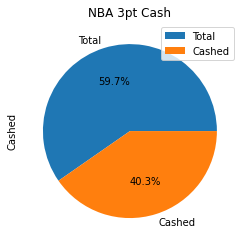

In [ ]:
import pandas
from builtins import round

df3x2Breakdown = spark.sql("""select 3pt_makes, count(3pt_makes) as count
from 3x2_results 
group by 3pt_makes
order by 3pt_makes""")

df3x2Breakdown.show()

df3x2Breakdown.toPandas().plot(kind='bar', x='3pt_makes', y='count', title='Number of 3pt makes in first 3 mins')



total_games = spark.sql("""select count(distinct game_id) as total_games from all_shots""").first().total_games

cashed = spark.sql("""select count(3pt_makes) as cash from 3x2_results
where 3pt_makes >= 2""").first().cash

dfTotals = pandas.DataFrame({"Cashed": [total_games - cashed, cashed]}, index=["Total", "Cashed"])

dfTotals.plot(kind='pie', y='Cashed', autopct='%1.1f%%', title='NBA 3pt Cash')

print("{} / {} = {}%".format(cashed, total_games, round((cashed / total_games) * 100, 2)))

In [ ]:
import pandas

df3x2TeamBreakdown = spark.sql("""select game_number, home_team, away_team, 3pt_makes, count(3pt_makes) as count
from 3x2_results 
group by game_number, home_team, away_team, 3pt_makes
order by home_team, 3pt_makes""")

df3x2TeamBreakdown.createOrReplaceTempView("3x2_team_breakdown")

df3x2TeamBreakdown.show()

df3x2TeamBreakdownMakes = spark.sql("""select game_number, home_team, away_team, 3pt_makes, sum(count) as count
from 3x2_team_breakdown 
where 3pt_makes >= 2
group by game_number, home_team, away_team, 3pt_makes""")

df3x2TeamBreakdownMakes.createOrReplaceTempView("3x2_team_breakdown_makes")

df3x2TeamBreakdownMakes.show()

df3x2TeamBreakdownMisses = spark.sql("""select game_number, home_team, away_team, 3pt_makes, sum(count) as count
from 3x2_team_breakdown 
where 3pt_makes < 2
group by game_number, home_team, away_team, 3pt_makes""")

df3x2TeamBreakdownMisses.createOrReplaceTempView("3x2_team_breakdown_misses")

df3x2TeamBreakdownMisses.show()

+-----------+---------+---------+---------+-----+
|game_number|home_team|away_team|3pt_makes|count|
+-----------+---------+---------+---------+-----+
|          3|      ATL|      HOU|        0|    1|
|         37|      ATL|      CHO|        1|    1|
|         17|      ATL|      ORL|        1|    1|
|          1|      BOS|      PHI|        1|    1|
|         70|      BOS|      CLE|        1|    1|
|         88|      BOS|      WAS|        4|    1|
|         18|      BRK|      TOR|        0|    1|
|        103|      BRK|      CHI|        0|    1|
|         96|      BRK|      IND|        1|    1|
|         81|      BRK|      IND|        1|    1|
|          4|      BRK|      NOP|        1|    1|
|         66|      BRK|      DAL|        1|    1|
|        107|      CHI|      CHO|        0|    1|
|         82|      CHI|      PHI|        1|    1|
|         28|      CHI|      CLE|        1|    1|
|         44|      CHI|      BOS|        1|    1|
|         56|      CHI|      IND|        6|    1|


In [ ]:
import pandas
from pyspark.sql.functions import col, round, row_number, lit
from pyspark.sql.window import Window

df3x2TeamMakes = spark.sql("""select home_team as team, sum(count) as count
from 3x2_team_breakdown_makes
group by home_team""").union(
    spark.sql("""select away_team as team, sum(count) as count
    from 3x2_team_breakdown_makes
    group by away_team""")
)

df3x2TeamMakes.createOrReplaceTempView("3x2_team_makes")

df3x2TeamMakesFinal = spark.sql("""select team, sum(count) as make_count
from 3x2_team_makes
group by team
order by make_count desc""")

# df3x2TeamMakesFinal.show()

df3x2TeamMisses = spark.sql("""select home_team as team, sum(count) as count
from 3x2_team_breakdown_misses
group by home_team""").union(
    spark.sql("""select away_team as team, sum(count) as count
    from 3x2_team_breakdown_misses
    group by away_team""")
)

df3x2TeamMisses.createOrReplaceTempView("3x2_team_misses")

df3x2TeamMissesFinal = spark.sql("""select team, sum(count) as miss_count
from 3x2_team_misses
group by team
order by miss_count desc""")

# df3x2TeamMissesFinal.show()

dfTeamTotalGames = spark.sql("""select team, sum(count) as total_games
from (
    select team, count
    from 3x2_team_makes
    union all
    select team, count
    from 3x2_team_misses
) a
group by team
order by total_games desc""")

# dfTeamTotalGames.show()

dfFullTeamBreakdown = dfTeamTotalGames.join(df3x2TeamMakesFinal, on='team', how="outer").join(df3x2TeamMissesFinal, on='team', how="outer").withColumn("make_pct", round((col("make_count") / col("total_games")) * 100, 2)) \
    .select('team', 'make_count', 'miss_count', 'total_games', 'make_pct').orderBy('make_pct', ascending=False).withColumn("rank", row_number().over(Window.partitionBy(lit(0)).orderBy(col("make_pct").desc()))) \
        .selectExpr('rank', 'team', "coalesce(make_count, 0) as make_count", 'coalesce(miss_count, 0) as miss_count', 'total_games', 'coalesce(make_pct, 0) as make_pct')
dfFullTeamBreakdown.createOrReplaceTempView("full_team_breakdown")

dfFullTeamBreakdown.show()

+----+----+----------+----------+-----------+--------+
|rank|team|make_count|miss_count|total_games|make_pct|
+----+----+----------+----------+-----------+--------+
|   1| GSW|         7|         2|          9|   77.78|
|   2| WAS|         6|         2|          8|    75.0|
|   3| NYK|         5|         2|          7|   71.43|
|   4| DEN|         5|         3|          8|    62.5|
|   5| IND|         5|         3|          8|    62.5|
|   6| CLE|         4|         3|          7|   57.14|
|   7| SAC|         4|         3|          7|   57.14|
|   8| MIA|         5|         4|          9|   55.56|
|   9| PHI|         5|         4|          9|   55.56|
|  10| UTA|         5|         4|          9|   55.56|
|  11| DET|         4|         5|          9|   44.44|
|  12| LAL|         3|         4|          7|   42.86|
|  13| POR|         3|         4|          7|   42.86|
|  14| LAC|         3|         5|          8|    37.5|
|  15| MIN|         3|         5|          8|    37.5|
|  16| TOR

In [ ]:
import pandas
from pyspark.sql.functions import col, round, row_number, lit
from pyspark.sql.window import Window

game_number_last_15 = spark.sql("""select max(game_number) as max_game_number
from 3x2_team_breakdown""").first().max_game_number - 85*3

df3x2TeamBreakdownMakesLast15 = df3x2TeamBreakdownMakes.filter(col("game_number") >= game_number_last_15)
df3x2TeamBreakdownMissesLast15 = df3x2TeamBreakdownMisses.filter(col("game_number") >= game_number_last_15)
df3x2TeamBreakdownMakesLast15.createOrReplaceTempView("3x2_team_breakdown_makes_last_15")
df3x2TeamBreakdownMissesLast15.createOrReplaceTempView("3x2_team_breakdown_misses_last_15")

df3x2TeamMakesLast15 = spark.sql("""select home_team as team, sum(count) as count
from 3x2_team_breakdown_makes_last_15
group by home_team""").union(
    spark.sql("""select away_team as team, sum(count) as count
    from 3x2_team_breakdown_makes_last_15
    group by away_team""")
)

df3x2TeamMakesLast15.createOrReplaceTempView("3x2_team_makes_last_15")

df3x2TeamMakesFinalLast15 = spark.sql("""select team, sum(count) as make_count
from 3x2_team_makes_last_15
group by team
order by make_count desc""")

# df3x2TeamMakesFinal.show()

df3x2TeamMissesLast15 = spark.sql("""select home_team as team, sum(count) as count
from 3x2_team_breakdown_misses_last_15
group by home_team""").union(
    spark.sql("""select away_team as team, sum(count) as count
    from 3x2_team_breakdown_misses_last_15
    group by away_team""")
)

df3x2TeamMissesLast15.createOrReplaceTempView("3x2_team_misses_last_15")

df3x2TeamMissesFinalLast15 = spark.sql("""select team, sum(count) as miss_count
from 3x2_team_misses_last_15
group by team
order by miss_count desc""")

# df3x2TeamMissesFinal.show()

dfTeamTotalGamesLast15 = spark.sql("""select team, sum(count) as total_games
from (
    select team, count
    from 3x2_team_makes_last_15
    union all
    select team, count
    from 3x2_team_misses_last_15
) a
group by team
order by total_games desc""")

# dfTeamTotalGames.show()

dfFullTeamBreakdownLast15 = dfTeamTotalGamesLast15.join(df3x2TeamMakesFinalLast15, on='team', how='outer').join(df3x2TeamMissesFinalLast15, on='team', how='outer').withColumn("make_pct", round((col("make_count") / col("total_games")) * 100, 2)) \
    .select('team', 'make_count', 'miss_count', 'total_games', 'make_pct').orderBy('make_pct', ascending=False).withColumn("rank", row_number().over(Window.partitionBy(lit(0)).orderBy(col("make_pct").desc()))) \
        .selectExpr('rank', 'team', "coalesce(make_count, 0) as make_count", 'coalesce(miss_count, 0) as miss_count', 'total_games', 'coalesce(make_pct, 0) as make_pct')
dfFullTeamBreakdownLast15.createOrReplaceTempView("full_team_breakdown_last_15")

dfFullTeamBreakdownLast15.show()

+----+----+----------+----------+-----------+--------+
|rank|team|make_count|miss_count|total_games|make_pct|
+----+----+----------+----------+-----------+--------+
|   1| GSW|         7|         2|          9|   77.78|
|   2| WAS|         6|         2|          8|    75.0|
|   3| NYK|         5|         2|          7|   71.43|
|   4| DEN|         5|         3|          8|    62.5|
|   5| IND|         5|         3|          8|    62.5|
|   6| CLE|         4|         3|          7|   57.14|
|   7| SAC|         4|         3|          7|   57.14|
|   8| MIA|         5|         4|          9|   55.56|
|   9| PHI|         5|         4|          9|   55.56|
|  10| UTA|         5|         4|          9|   55.56|
|  11| DET|         4|         5|          9|   44.44|
|  12| LAL|         3|         4|          7|   42.86|
|  13| POR|         3|         4|          7|   42.86|
|  14| LAC|         3|         5|          8|    37.5|
|  15| MIN|         3|         5|          8|    37.5|
|  16| TOR

In [ ]:
import pandas
from pyspark.sql.functions import col, round, row_number, lit
from pyspark.sql.window import Window

game_number_last_5 = spark.sql("""select max(game_number) as max_game_number
from 3x2_team_breakdown""").first().max_game_number - 85

df3x2TeamBreakdownMakesLast5 = df3x2TeamBreakdownMakes.filter(col("game_number") >= game_number_last_5)
df3x2TeamBreakdownMissesLast5 = df3x2TeamBreakdownMisses.filter(col("game_number") >= game_number_last_5)
df3x2TeamBreakdownMakesLast5.createOrReplaceTempView("3x2_team_breakdown_makes_last_5")
df3x2TeamBreakdownMissesLast5.createOrReplaceTempView("3x2_team_breakdown_misses_last_5")

df3x2TeamMakesLast5 = spark.sql("""select home_team as team, sum(count) as count
from 3x2_team_breakdown_makes_last_5
group by home_team""").union(
    spark.sql("""select away_team as team, sum(count) as count
    from 3x2_team_breakdown_makes_last_5
    group by away_team""")
)

df3x2TeamMakesLast5.createOrReplaceTempView("3x2_team_makes_last_5")

df3x2TeamMakesFinalLast5 = spark.sql("""select team, sum(count) as make_count
from 3x2_team_makes_last_5
group by team
order by make_count desc""")

# df3x2TeamMakesFinal.show()

df3x2TeamMissesLast5 = spark.sql("""select home_team as team, sum(count) as count
from 3x2_team_breakdown_misses_last_5
group by home_team""").union(
    spark.sql("""select away_team as team, sum(count) as count
    from 3x2_team_breakdown_misses_last_5
    group by away_team""")
)

df3x2TeamMissesLast5.createOrReplaceTempView("3x2_team_misses_last_5")

df3x2TeamMissesFinalLast5 = spark.sql("""select team, sum(count) as miss_count
from 3x2_team_misses_last_5
group by team
order by miss_count desc""")

# df3x2TeamMissesFinal.show()

dfTeamTotalGamesLast5 = spark.sql("""select team, sum(count) as total_games
from (
    select team, count
    from 3x2_team_makes_last_5
    union all
    select team, count
    from 3x2_team_misses_last_5
) a
group by team
order by total_games desc""")

# dfTeamTotalGames.show()

dfFullTeamBreakdownLast5 = dfTeamTotalGamesLast5.join(df3x2TeamMakesFinalLast5, on='team', how="outer").join(df3x2TeamMissesFinalLast5, on='team', how="outer").withColumn("make_pct", round((col("make_count") / col("total_games")) * 100, 2)) \
    .select('team', 'make_count', 'miss_count', 'total_games', 'make_pct').orderBy('make_pct', ascending=False).withColumn("rank", row_number().over(Window.partitionBy(lit(0)).orderBy(col("make_pct").desc()))) \
        .selectExpr('rank', 'team', "coalesce(make_count, 0) as make_count", 'coalesce(miss_count, 0) as miss_count', 'total_games', 'coalesce(make_pct, 0) as make_pct')
dfFullTeamBreakdownLast5.createOrReplaceTempView("full_team_breakdown_last_5")

dfFullTeamBreakdownLast5.show()

+----+----+----------+----------+-----------+--------+
|rank|team|make_count|miss_count|total_games|make_pct|
+----+----+----------+----------+-----------+--------+
|   1| GSW|         6|         1|          7|   85.71|
|   2| WAS|         5|         1|          6|   83.33|
|   3| CLE|         4|         1|          5|    80.0|
|   4| DEN|         3|         2|          5|    60.0|
|   5| IND|         3|         2|          5|    60.0|
|   6| NYK|         3|         2|          5|    60.0|
|   7| PHI|         4|         3|          7|   57.14|
|   8| UTA|         4|         3|          7|   57.14|
|   9| MIA|         3|         3|          6|    50.0|
|  10| SAC|         3|         3|          6|    50.0|
|  11| ORL|         3|         4|          7|   42.86|
|  12| BOS|         2|         3|          5|    40.0|
|  13| DAL|         2|         3|          5|    40.0|
|  14| LAL|         2|         3|          5|    40.0|
|  15| TOR|         2|         3|          5|    40.0|
|  16| CHI

In [ ]:
import pandas

dfFullTeamBreakdownWithRecent = spark.sql("""select ftb.*, concat(ftb5.make_count, '-', ftb5.miss_count) as make_miss_recent_5, concat(ftb15.make_count, '-', ftb15.miss_count) as make_miss_recent_15,
case when (ftb5.make_count / (ftb5.make_count + ftb5.miss_count)) * 100 > ftb.make_pct then 'up' else 'down' end as trend_recent_5
from full_team_breakdown ftb
inner join full_team_breakdown_last_15 ftb15 on ftb.team = ftb15.team
inner join full_team_breakdown_last_5 ftb5 on ftb.team = ftb5.team
order by ftb.rank
""")

dfFullTeamBreakdownWithRecent.cache()

dfFullTeamBreakdownWithRecent.createOrReplaceTempView("full_team_breakdown_with_recent")

dfFullTeamBreakdownWithRecent.show()

+----+----+----------+----------+-----------+--------+------------------+-------------------+--------------+
|rank|team|make_count|miss_count|total_games|make_pct|make_miss_recent_5|make_miss_recent_15|trend_recent_5|
+----+----+----------+----------+-----------+--------+------------------+-------------------+--------------+
|   1| GSW|         7|         2|          9|   77.78|               6-1|                7-2|            up|
|   2| WAS|         6|         2|          8|    75.0|               5-1|                6-2|            up|
|   3| NYK|         5|         2|          7|   71.43|               3-2|                5-2|          down|
|   4| DEN|         5|         3|          8|    62.5|               3-2|                5-3|          down|
|   5| IND|         5|         3|          8|    62.5|               3-2|                5-3|          down|
|   6| CLE|         4|         3|          7|   57.14|               4-1|                4-3|            up|
|   7| SAC|        

In [ ]:
from pyspark.sql.functions import col, round, row_number, lit, dense_rank
from pyspark.sql.window import Window

# Get Shot breakdown per team in last 5 games
df3x2_total_shots_with_game_number = spark.sql("""SELECT game_id, relevant_team as offense_team, 
case when relevant_team != home_team then home_team else away_team end as defense_team, sum(total_shots) as total_shots
from 3x2_detail
group by game_id, relevant_team, case when relevant_team != home_team then home_team else away_team end
""").withColumn("game_number", dense_rank().over(Window.partitionBy(lit(0)).orderBy(col("game_id"))))

# df3x2_total_shots_with_game_number.show()

df3x2_total_shots_last_5 = df3x2_total_shots_with_game_number.filter(col("game_number") >= game_number_last_5)
df3x2_total_shots_last_5.createOrReplaceTempView("3x2_total_shots_last_5")

df3x2_all_shots_last_5 = spark.sql("""SELECT *, 
    coalesce((select sum(total_shots) from 3x2_detail x where a.game_id = x.game_id and a.offense_team = x.relevant_team and shot_type = 3 and shot_result = 'MAKE'), 0) as offense_3_makes,
    coalesce((select sum(total_shots) from 3x2_detail x where a.game_id = x.game_id and a.offense_team = x.relevant_team and shot_type = 3), 0) as offense_3_shots,
    coalesce((select sum(total_shots) from 3x2_detail x where a.game_id = x.game_id and a.offense_team = x.relevant_team and shot_type = 2 and shot_result = 'MAKE'), 0) as offense_2_makes,
    coalesce((select sum(total_shots) from 3x2_detail x where a.game_id = x.game_id and a.offense_team = x.relevant_team and shot_type = 2), 0) as offense_2_shots
from 3x2_total_shots_last_5 a
""")
df3x2_all_shots_last_5.createOrReplaceTempView("3x2_all_shots_last_5")

# df3x2_all_shots_last_5.show()

df3x2_all_stats_last_5 = spark.sql("""SELECT *, 
    round(offense_3_makes / 3, 2) as offense_3_makes_per_min,
    round(offense_3_shots / 3, 2) as offense_3_shots_per_min,
    round(offense_3_shots / (offense_3_shots + offense_2_shots) * 100) as offense_3_atmpt_pct
from 3x2_all_shots_last_5 a
""")
df3x2_all_stats_last_5.createOrReplaceTempView("3x2_all_stats_last_5")
# df3x2_all_stats_last_5.show()

df3x2_rollup_last_5_pt1 = spark.sql("""SELECT offense_team as team, round(avg(offense_3_makes), 1) as offense_3_makes, round(avg(offense_3_shots), 1) as offense_3_shots, round(avg(total_shots), 1) as total_shots
from 3x2_all_stats_last_5
group by offense_team
""")
df3x2_rollup_last_5_pt1.createOrReplaceTempView("3x2_rollup_last_5_pt1")

df3x2_rollup_last_5_pt2 = spark.sql("""select *, 
    coalesce((select round(avg(offense_3_makes), 1) from 3x2_all_stats_last_5 x where x.defense_team = a.team group by x.defense_team), 0) as defense_3_makes,
    coalesce((select round(avg(offense_3_shots), 1) from 3x2_all_stats_last_5 x where x.defense_team = a.team group by x.defense_team), 0) as defense_3_shots,
    coalesce((select round(avg(total_shots), 1) from 3x2_all_stats_last_5 x where x.defense_team = a.team group by x.defense_team), 0) as defense_total_shots
    from 3x2_rollup_last_5_pt1 a

""")
df3x2_rollup_last_5_pt2.createOrReplaceTempView("df3x2_rollup_last_5")
df3x2_rollup_last_5_pt2.cache()
df3x2_rollup_last_5_pt2.show()


+----+---------------+---------------+-----------+---------------+---------------+-------------------+
|team|offense_3_makes|offense_3_shots|total_shots|defense_3_makes|defense_3_shots|defense_total_shots|
+----+---------------+---------------+-----------+---------------+---------------+-------------------+
| GSW|            1.3|            3.0|        5.7|            1.0|            2.7|                6.0|
| DET|            0.7|            3.0|        5.7|            0.3|            1.7|                5.5|
| LAL|            0.2|            1.0|        5.8|            1.0|            2.8|                5.8|
| NYK|            0.8|            2.0|        6.4|            0.8|            2.2|                5.8|
| CHO|            0.8|            2.0|        6.0|            0.5|            1.8|                5.3|
| LAC|            0.3|            1.3|        4.7|            0.6|            1.4|                6.0|
| UTA|            1.3|            2.7|        5.1|            0.6|       

In [19]:
import pandas
from builtins import round
from basketball_reference_scraper.seasons import get_schedule
from basketball_reference_scraper.constants import TEAM_TO_TEAM_ABBR
import urllib.request, json
from scipy.stats import binom
from oddscalculator import *


games = get_schedule(2023, playoffs=False)

todaysGames = games.loc[games["DATE"].dt.strftime("%Y-%m-%d") == pd.to_datetime("today").strftime("%Y-%m-%d")]

print("Found {} games for today".format(len(todaysGames)))

# Get FD odds for today's games

fd_odds = {}

with urllib.request.urlopen("https://sbapi.nj.sportsbook.fanduel.com/api/content-managed-page?betexRegion=GBR&capiJurisdiction=intl&currencyCode=USD&exchangeLocale=en_US&includePrices=true&includeRaceCards=false&language=en&regionCode=NAMERICA&timezone=America%2FNew_York&includeMarketBlurbs=true&_ak=FhMFpcPWXMeyZxOx&page=CUSTOM&customPageId=nba") as url:
    data = json.loads(url.read().decode())
    for attr, market in data['attachments']['markets'].items():
        if 'marketType' in market and market['marketType'] == "2_OR_MORE_3_POINT_FGS_MADE_IN_THE_FIRST_3_MINUTES":
            mkt_key = market['marketId']
            fd_odds[mkt_key] = []
            for runner in market['runners']:
                fd_odds[mkt_key].append({ runner['runnerName']: runner['winRunnerOdds']['americanDisplayOdds']['americanOdds'] })

    for attr, coupon in data['layout']['coupons'].items():
        if 'marketTypes' in coupon and coupon['marketTypes'][0] == "2_OR_MORE_3_POINT_FGS_MADE_IN_THE_FIRST_3_MINUTES":
            title = coupon['title']
            if 'display' in coupon:
                try:
                    mkt_key = coupon['display'][0]['rows'][0]['marketIds'][0]
                    fd_odds[mkt_key].append({ "title": title.split(" ")[0] })
                except:
                    continue


    print(fd_odds)


teams = {
    "ATL": "Atlanta Hawks",
    "BKN": "Brooklyn Nets",
    "BOS": "Boston Celtics",
    "CHA": "Charlotte Hornets",
    "CHI": "Chicago Bulls",
    "CLE": "Cleveland Cavaliers",
    "DAL": "Dallas Mavericks",
    "DEN": "Denver Nuggets",
    "DET": "Detroit Pistons",
    "GSW": "Golden State Warriors",
    "HOU": "Houston Rockets",
    "IND": "Indiana Pacers",
    "LAC": "Los Angeles Clippers",
    "LAL": "Los Angeles Lakers",
    "MEM": "Memphis Grizzlies",
    "MIA": "Miami Heat",
    "MIL": "Milwaukee Bucks",
    "MIN": "Minnesota Timberwolves",
    "NOP": "New Orleans Pelicans",
    "NYK": "New York Knicks",
    "OKC": "Oklahoma City Thunder",
    "ORL": "Orlando Magic",
    "PHI": "Philadelphia 76ers",
    "PHX": "Phoenix Suns",
    "POR": "Portland Trail Blazers",
    "SAC": "Sacramento Kings",
    "SAS": "San Antonio Spurs",
    "TOR": "Toronto Raptors",
    "UTA": "Utah Jazz",
    "WAS": "Washington Wizards"
}

replacement_codes = {
    'BRK': 'BKN',
    'CHO': 'CHA',
    'PHO': 'PHX'
}

replacement_nouns = {
    'Cavs': 'Cavaliers',
    'Mavs': 'Mavericks',
    "T'wolves": 'Timberwolves',
    "T'Wolves": 'Timberwolves',
    "T`Wolves": 'Timberwolves',
    "Trail": 'Blazers'
}

# make a dict with team name as key and abbreviation as value - i.e. Blazers -> POR
teams_fixed = { v.split(" ")[-1]: k for k, v in teams.items() }

# replace market_id key with team names and then to team codes
fd_odds2 = {}
for k, v in fd_odds.items():
    team_codes = ""
    for team_name in v[2]['title'].split('-'):
        if not team_name in teams_fixed:
             team_noun_fixed = teams_fixed[replacement_nouns[team_name]]
        else:
            team_noun_fixed = teams_fixed[team_name]
        team_codes = team_codes + "_" + team_noun_fixed
    team_codes = team_codes[1:]
    del v[2]
    fd_odds2[team_codes] = v

fd_odds = fd_odds2

# Get 3pt make %
three_pt_make_pct = spark.sql("""select ROUND(sum(three_pt_made) / sum(three_pt_attempts) * 100, 2) as three_pt_make_pct
from 3x2_player_shot_breakdown_pt2""").collect()[0].three_pt_make_pct

print("NBA 3x2 make %: {}%".format(three_pt_make_pct))

for index, game in todaysGames.iterrows():
    homeTeamCode = TEAM_TO_TEAM_ABBR[game["HOME"].upper()]
    awayTeamCode = TEAM_TO_TEAM_ABBR[game["VISITOR"].upper()]
    dfMatchup = spark.sql("""select a.*, b.offense_3_makes, offense_3_shots, b.total_shots, b.defense_3_makes, b.defense_3_shots, b.defense_total_shots from full_team_breakdown_with_recent a
     inner join df3x2_rollup_last_5 b on a.team = b.team
     where a.team in ('{}', '{}')"""
        .format(homeTeamCode, awayTeamCode))

    print(homeTeamCode + " / " + awayTeamCode)
    dfMatchup.show()

    dfMatchup = dfMatchup.collect()

    total3s = dfMatchup[0].offense_3_shots + dfMatchup[1].offense_3_shots
    probYes3x1 = binom.sf(k=0, n=total3s, p=three_pt_make_pct/100)
    probYes3x2 = binom.sf(k=1, n=total3s, p=three_pt_make_pct/100)
    probYes3x3 = binom.sf(k=2, n=total3s, p=three_pt_make_pct/100)
    probNo3x2 = 1 - probYes3x2
    
    try:
        team1_pct = dfMatchup[0].make_pct
    except:
        team1_pct = 0

    try:
        team1_pct_recent_5 = (int(dfMatchup[0].make_miss_recent_5.split("-")[0]) / 
            (int(dfMatchup[0].make_miss_recent_5.split("-")[0]) + int(dfMatchup[0].make_miss_recent_5.split("-")[1]))) * 100
    except:
        team1_pct_recent_5 = 0

    try:
        team1_pct_recent_15 = (int(dfMatchup[0].make_miss_recent_15.split("-")[0]) / 
            (int(dfMatchup[0].make_miss_recent_15.split("-")[0]) + int(dfMatchup[0].make_miss_recent_15.split("-")[1]))) * 100
    except:
        team1_pct_recent_15 = 0
    
    try:
        team2_pct = dfMatchup[1].make_pct
    except:
        team2_pct = 0

    try:
        team2_pct_recent_5 = (int(dfMatchup[1].make_miss_recent_5.split("-")[0]) / 
            (int(dfMatchup[1].make_miss_recent_5.split("-")[0]) + int(dfMatchup[1].make_miss_recent_5.split("-")[1]))) * 100
    except:
        team2_pct_recent_5 = 0

    try:
        team2_pct_recent_15 = (int(dfMatchup[1].make_miss_recent_15.split("-")[0]) / 
            (int(dfMatchup[1].make_miss_recent_15.split("-")[0]) + int(dfMatchup[1].make_miss_recent_15.split("-")[1]))) * 100
    except:
        team2_pct_recent_15 = 0

    total_pct = (team1_pct + team2_pct) / 2
    total_pct_recent_5 = (team1_pct_recent_5 + team2_pct_recent_5) / 2
    total_pct_recent_15 = (team1_pct_recent_15 + team2_pct_recent_15) / 2

    dec_odds = 1 / (total_pct / 100)
    dec_odds_recent_5 = 1 / (total_pct_recent_5 / 100)
    dec_odds_recent_15 = 1 / (total_pct_recent_15 / 100)
    dec_odds_yes_3x3 = 1 / (probYes3x3)
    dec_odds_yes_3x2 = 1 / (probYes3x2)
    dec_odds_yes_3x1 = 1 / (probYes3x1)
    dec_odds_no_3x2 = 1 / (probNo3x2)

    american_odds = DecimalOdds(float(dec_odds)).american
    american_odds_recent_5 = DecimalOdds(float(dec_odds_recent_5)).american
    american_odds_recent_15 = DecimalOdds(float(dec_odds_recent_15)).american
    american_odds_probability_3x3 = DecimalOdds(float(dec_odds_yes_3x3)).american
    american_odds_probability_3x2 = DecimalOdds(float(dec_odds_yes_3x2)).american
    american_odds_probability_3x1 = DecimalOdds(float(dec_odds_yes_3x1)).american

    fdAwayTeam = awayTeamCode
    if fdAwayTeam in replacement_codes:
        fdAwayTeam = replacement_codes[awayTeamCode]

    fdHomeTeam = homeTeamCode
    if fdHomeTeam in replacement_codes:
        fdHomeTeam = replacement_codes[homeTeamCode]

    print("Percentage [overall]: {}%, American odds: {:+}".format(round(total_pct, 2), round(american_odds)))
    print("Percentage [recent 15]: {}%, American odds: {:+}".format(round(total_pct_recent_15, 2), round(american_odds_recent_15)))
    print("Percentage [recent 5]: {}%, American odds: {:+}".format(round(total_pct_recent_5, 2), round(american_odds_recent_5)))
    print("")
    print("Percentage [recent 5 3PA, 3x2]: {}%, American odds: {:+}".format(round(probYes3x2 * 100, 2), int(round(american_odds_probability_3x2))))
    print("")
    print("Percentage [recent 5 3PA, 3x3]: {}%, American odds: {:+}".format(round(probYes3x3 * 100, 2), int(round(american_odds_probability_3x3))))
    print("Percentage [recent 5 3PA, 3x1]: {}%, American odds: {:+}".format(round(probYes3x1 * 100, 2), int(round(american_odds_probability_3x1))))
    try:
        fdOdds = 0
        if fdAwayTeam + "_" + fdHomeTeam in fd_odds:
            fdOdds = fd_odds[fdAwayTeam + "_" + fdHomeTeam]       
        else:
            fdOdds = fd_odds[fdHomeTeam + "_" + fdAwayTeam]
        
        print("Fanduel Odds => " + str(fdOdds))

        ev_3pa_yes = (probYes3x2) * (100.0 * (AmericanOdds(fdOdds[0]['Yes']).decimal - 1.0)) - (1.0 - probYes3x2) * (100.0)
        ev_3pa_no = (probNo3x2) * (100.0 * (AmericanOdds(fdOdds[1]['No']).decimal - 1.0)) - (1.0 - probNo3x2) * (100.0)
        print("EV 3PA Yes: {:+}%".format(round(ev_3pa_yes, 2)))
        print("EV 3PA No: {:+}%".format(round(ev_3pa_no, 2)))
    except:
        print("************* No Fanduel odds found for {} vs {} **************".format(fdAwayTeam, fdHomeTeam))
    print("")
    print("")

Found 12 games for today
{}
NBA 3x2 make %: 38.77%
DET / CLE
+----+----+----------+----------+-----------+--------+------------------+-------------------+--------------+---------------+---------------+-----------+---------------+---------------+-------------------+
|rank|team|make_count|miss_count|total_games|make_pct|make_miss_recent_5|make_miss_recent_15|trend_recent_5|offense_3_makes|offense_3_shots|total_shots|defense_3_makes|defense_3_shots|defense_total_shots|
+----+----+----------+----------+-----------+--------+------------------+-------------------+--------------+---------------+---------------+-----------+---------------+---------------+-------------------+
|   6| CLE|         4|         3|          7|   57.14|               4-1|                4-3|            up|            1.4|            2.2|        6.2|            0.8|            2.2|                5.4|
|  11| DET|         4|         5|          9|   44.44|               2-4|                4-5|          down|           